# Непараметрические криетрии

  Критерий | Одновыборочный | Двухвыборочный | Двухвыборочный (связанные выборки)  
  ------------- | -------------|
  **Знаков**  | $\times$ | | $\times$ 
  **Ранговый** | $\times$  | $\times$ | $\times$  
  **Перестановочный** | $\times$  | $\times$ | $\times$ 

## Mirrors as potential environmental enrichment for individually housed laboratory mice

(Sherwin, 2004): 16 лабораторных мышей были помещены в двухкомнатные клетки, в одной из комнат висело зеркало. С целью установить, есть ли у мышей какие-то предпочтения насчет зеркал, измерялась доля времени, которое каждая мышь проводила в каждой из своих двух клеток.

In [1]:
import numpy as np
import pandas as pd
import itertools

from scipy import stats
from statsmodels.stats.descriptivestats import sign_test
from statsmodels.stats.weightstats import zconfint

In [2]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


### Загрузка данных

In [3]:
mouses_data = pd.read_csv('mirror_mouses.txt', header = None)
mouses_data.columns = ['proportion_of_time']

In [6]:
mouses_data

,proportion_of_time
0,0.348471
1,0.640620
2,0.549818
3,0.537454
4,0.400444
5,0.426292
6,0.417156
7,0.477977
8,0.450657
9,0.476602


In [7]:
mouses_data.describe()

,proportion_of_time
count,16.000000
mean,0.475289
std,0.066065
min,0.348471
25%,0.444566
50%,0.477289
75%,0.488859
max,0.640620


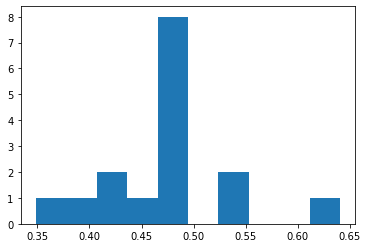

In [8]:
pylab.hist(mouses_data.proportion_of_time)
pylab.show()

## Одновыборочные критерии

In [10]:
print('95%% confidence interval for the mean time: [%f, %f]' % zconfint(mouses_data))

95% confidence interval for the mean time: [0.442918, 0.507660]


### Критерий знаков

$H_0\colon$ медиана доли времени, проведенного в клетке с зеркалом, равна 0.5

$H_1\colon$ медиана доли времени, проведенного в клетке с зеркалом, не равна 0.5

In [11]:
print("M: %d, p-value: %f" % sign_test(mouses_data, 0.5))

M: -5, p-value: 0.021271


### Критерий знаковых рангов Вилкоксона

In [12]:
m0 = 0.5
stats.wilcoxon(mouses_data.proportion_of_time - m0)

WilcoxonResult(statistic=35.0, pvalue=0.09344482421875)

### Перестановочный критерий

$H_0\colon$ среднее равно 0.5

$H_1\colon$ среднее не равно 0.5

In [18]:
def permutation_t_stat_1sample(sample, mean):
    t_stat = sum(list(map(lambda x: x - mean, sample)))
    return t_stat

In [19]:
permutation_t_stat_1sample(mouses_data.proportion_of_time, 0.5)

-0.3953776999999997

In [20]:
def permutation_zero_distr_1sample(sample, mean, max_permutations = None):
    centered_sample = list(map(lambda x: x - mean, sample))
    if max_permutations:
        signs_array = set([tuple(x) for x in 2 * np.random.randint(2, size = (max_permutations, 
                                                                              len(sample))) - 1 ])
    else:
        signs_array =  itertools.product([-1, 1], repeat = len(sample))
    distr = [sum(centered_sample * np.array(signs)) for signs in signs_array]
    return distr

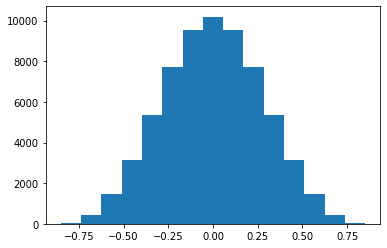

In [21]:
pylab.hist(permutation_zero_distr_1sample(mouses_data.proportion_of_time, 0.5), bins = 15)
pylab.show()

In [14]:
def permutation_test(sample, mean, max_permutations = None, alternative = 'two-sided'):
    if alternative not in ('two-sided', 'less', 'greater'):
        raise ValueError("alternative not recognized\n"
                         "should be 'two-sided', 'less' or 'greater'")
    
    t_stat = permutation_t_stat_1sample(sample, mean)
    
    zero_distr = permutation_zero_distr_1sample(sample, mean, max_permutations)
    
    if alternative == 'two-sided':
        return sum([1. if abs(x) >= abs(t_stat) else 0. for x in zero_distr]) / len(zero_distr)
    
    if alternative == 'less':
        return sum([1. if x <= t_stat else 0. for x in zero_distr]) / len(zero_distr)

    if alternative == 'greater':
        return sum([1. if x >= t_stat else 0. for x in zero_distr]) / len(zero_distr)

In [15]:
print "p-value: %f" % permutation_test(mouses_data.proportion_of_time, 0.5)

p-value: 0.157776


In [16]:
print "p-value: %f" % permutation_test(mouses_data.proportion_of_time, 0.5, 10000)

p-value: 0.165390
